In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
import glob


In [36]:
glob.glob(r"C:\Users\nidhi\stocks_data/*csv")

['C:\\Users\\nidhi\\stocks_data\\AAPL_data.csv',
 'C:\\Users\\nidhi\\stocks_data\\AMZN_data.csv',
 'C:\\Users\\nidhi\\stocks_data\\GOOGL_data.csv',
 'C:\\Users\\nidhi\\stocks_data\\MSFT_data.csv']

In [37]:
len(glob.glob(r"C:\Users\nidhi\stocks_data/*csv"))

4

In [38]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [39]:
company_list=[r'C:\\Users\\nidhi\\stocks_data\\AAPL_data.csv',
 r'C:\\Users\\nidhi\\stocks_data\\AMZN_data.csv',
 r'C:\\Users\\nidhi\\stocks_data\\GOOGL_data.csv',
 r'C:\\Users\\nidhi\\stocks_data\\MSFT_data.csv']

In [40]:
all_data=pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(file)
    all_data=pd.concat([current_df,all_data],ignore_index=True)

In [41]:
 all_data

date     open    high       low   close    volume  Name
0     2013-02-08   27.350   27.71   27.3100   27.55  33318306  MSFT
1     2013-02-11   27.650   27.92   27.5000   27.86  32247549  MSFT
2     2013-02-12   27.880   28.00   27.7500   27.88  35990829  MSFT
3     2013-02-13   27.930   28.11   27.8800   28.03  41715530  MSFT
4     2013-02-14   27.920   28.06   27.8700   28.04  32663174  MSFT
...          ...      ...     ...       ...     ...       ...   ...
5031  2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL
5032  2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL
5033  2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL
5034  2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL
5035  2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL

[5036 rows x 7 columns]

In [42]:
all_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5031    False
5032    False
5033    False
5034    False
5035    False
Length: 5036, dtype: bool

In [43]:
tech_list=all_data['Name'].unique()

In [44]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [45]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [46]:
all_data['date']=pd.to_datetime(all_data['date'])

In [47]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
5031   2018-02-01
5032   2018-02-02
5033   2018-02-05
5034   2018-02-06
5035   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

In [48]:
#trend in closing prices of company over years


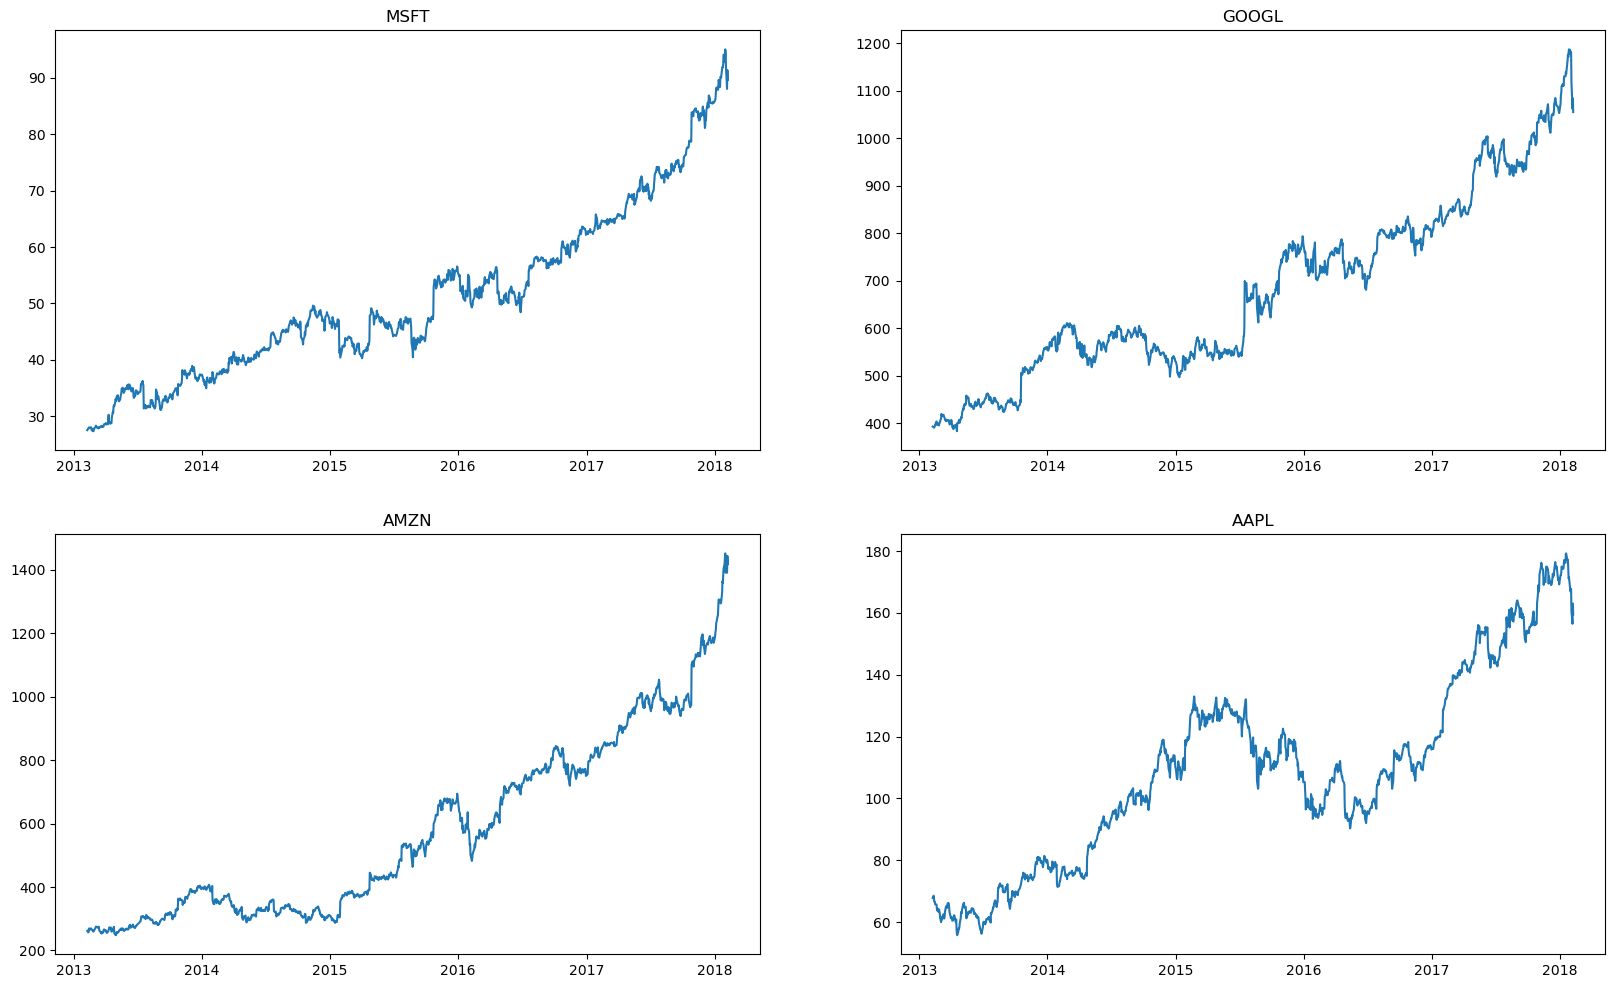

In [49]:
plt.figure(figsize=(20,12))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=all_data['Name']==company
    df=all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)

In [50]:
#moving average of various stocks

In [51]:
all_data['close'].rolling(window=10).mean().head(15)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
14    27.7475
Name: close, dtype: float64

In [52]:
ma_day=[10,30,50]
new_data=all_data.copy()
for ma in ma_day:
    new_data['close_'+str(ma)]=new_data['close'].rolling(ma).mean()

In [53]:
new_data.set_index('date',inplace=True)

In [54]:
new_data

open    high       low   close    volume  Name  close_10  \
date                                                                      
2013-02-08   27.350   27.71   27.3100   27.55  33318306  MSFT       NaN   
2013-02-11   27.650   27.92   27.5000   27.86  32247549  MSFT       NaN   
2013-02-12   27.880   28.00   27.7500   27.88  35990829  MSFT       NaN   
2013-02-13   27.930   28.11   27.8800   28.03  41715530  MSFT       NaN   
2013-02-14   27.920   28.06   27.8700   28.04  32663174  MSFT       NaN   
...             ...     ...       ...     ...       ...   ...       ...   
2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL   171.948   
2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL   170.152   
2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL   168.101   
2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL   166.700   
2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL   165.232   

              close_30  close_50  
date                              
2013-02-08         NaN       NaN  
2013-02-11         NaN       NaN  
2013-02-12         NaN       NaN  
2013-02-13         NaN       NaN  
2013-02-14         NaN       NaN  
...                ...       ...  
2018-02-01  173.409333  172.8252  
2018-02-02  172.941333  172.6356  
2018-02-05  172.346000  172.3026  
2018-02-06  171.946667  172.0640  
2018-02-07  171.431000  171.7554  

[5036 rows x 9 columns]

In [55]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_30', 'close_50'],
      dtype='object')

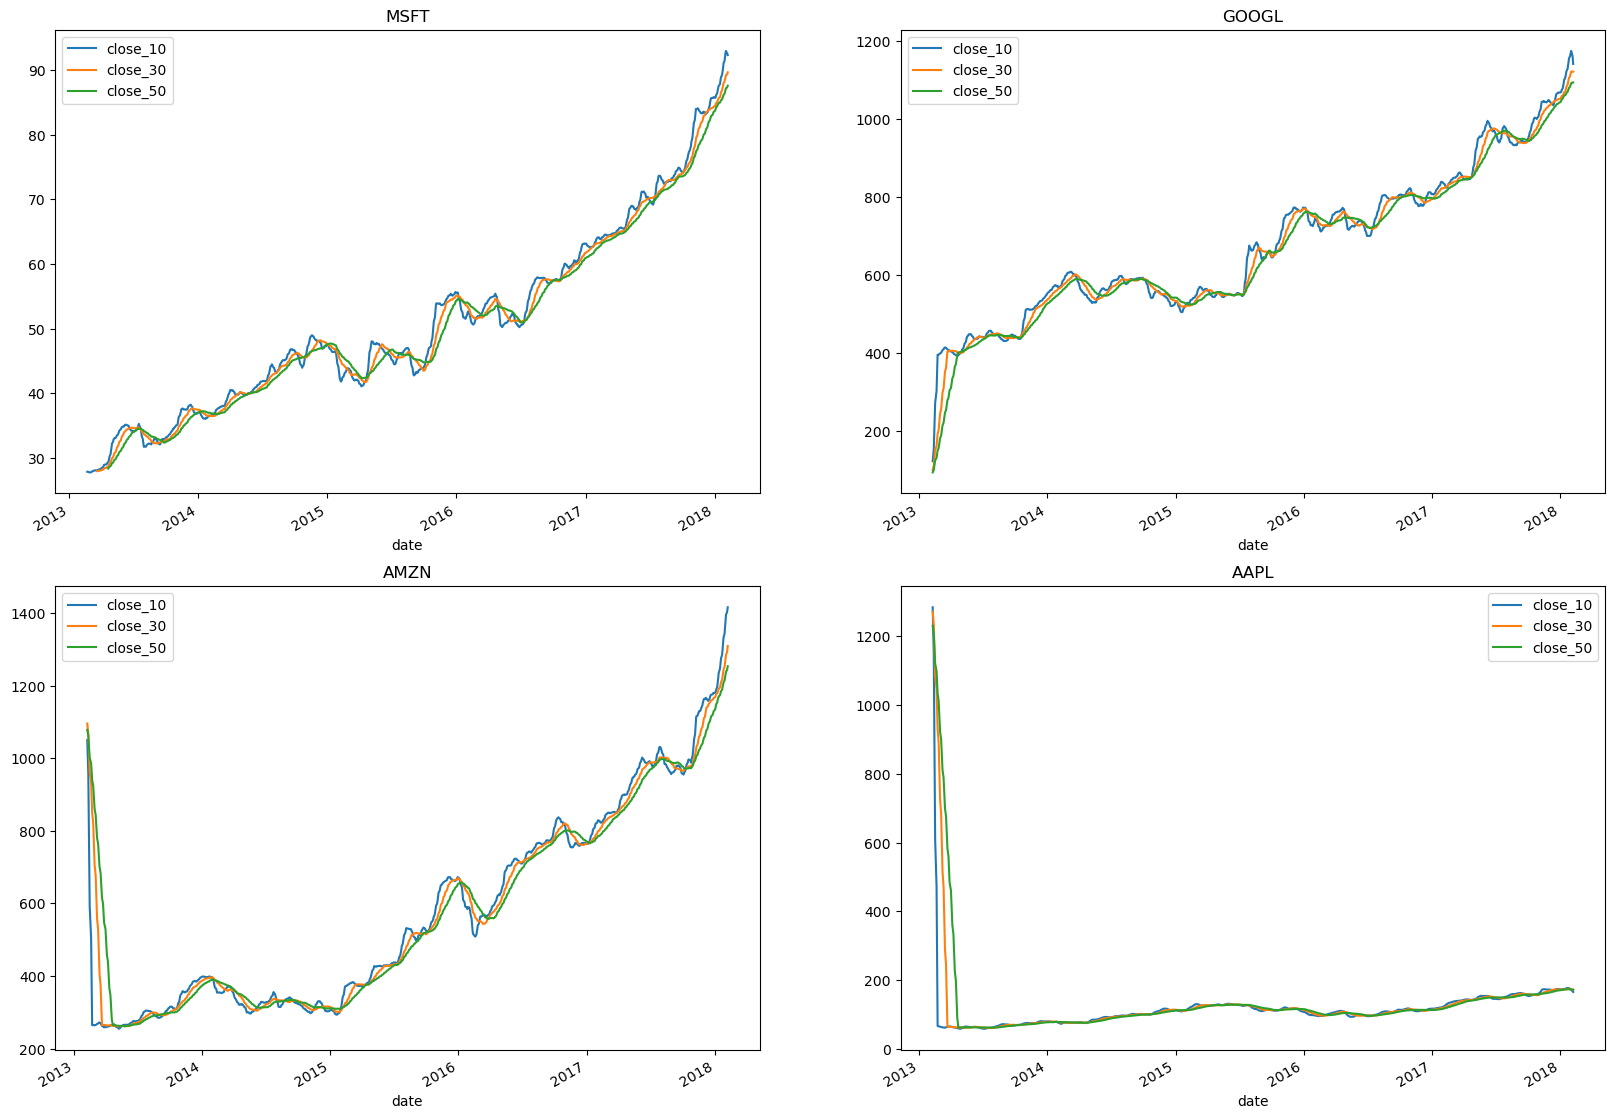

In [56]:
plt.figure(figsize=(20,15))
for index,company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=new_data['Name']==company
    df=new_data[filter1]
    df[['close_10','close_30', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

In [57]:
#analysing closeing price change in percentage terms in apple stock

In [58]:
tech_list

array(['MSFT', 'GOOGL', 'AMZN', 'AAPL'], dtype=object)

In [59]:
apple_df=pd.read_csv(r'C:\\Users\\nidhi\\stocks_data\\AAPL_data.csv')
apple_df

date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]

In [60]:

apple_df['change in(%)']=apple_df['close'].pct_change()*100

In [61]:
apple_df

date      open      high       low     close     volume  Name  \
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL   
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL   
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL   
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL   
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL   
...          ...       ...       ...       ...       ...        ...   ...   
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL   
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL   
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL   
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL   
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL   

      change in(%)  
0              NaN  
1         1.042235  
2        -2.506658  
3        -0.190297  
4        -0.089934  
...            ...  
1254      0.209043  
1255     -4.339015  
1256     -2.498442  
1257      4.179181  
1258     -2.140710  

[1259 rows x 8 columns]

In [62]:
import plotly.express as px

In [63]:
px.line(apple_df,x='date',y='change in(%)')

In [64]:
#performing resampling analysis of closing prices analysis on yearly and quarterly basis i.e. average price of closing over time

In [65]:
apple_df.dtypes


date             object
open            float64
high            float64
low             float64
close           float64
volume            int64
Name             object
change in(%)    float64
dtype: object

In [66]:
apple_df['date']=pd.to_datetime(apple_df['date'])

In [67]:
apple_df.dtypes

date            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
volume                   int64
Name                    object
change in(%)           float64
dtype: object

In [68]:
apple_df.set_index('date',inplace=True)

In [69]:
apple_df

open      high       low     close     volume  Name  \
date                                                                  
2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL   
2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL   
2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL   
2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL   
2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL   
...              ...       ...       ...       ...        ...   ...   
2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL   
2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL   
2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL   
2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL   
2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL   

            change in(%)  
date                      
2013-02-08           NaN  
2013-02-11      1.042235  
2013-02-12     -2.506658  
2013-02-13     -0.190297  
2013-02-14     -0.089934  
...                  ...  
2018-02-01      0.209043  
2018-02-02     -4.339015  
2018-02-05     -2.498442  
2018-02-06      4.179181  
2018-02-07     -2.140710  

[1259 rows x 7 columns]

<Axes: xlabel='date'>

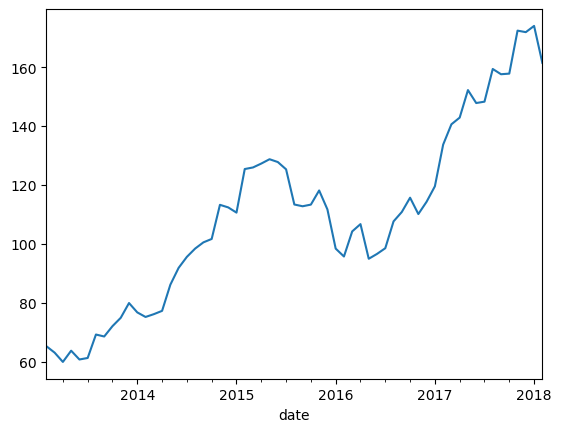

In [70]:
apple_df['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

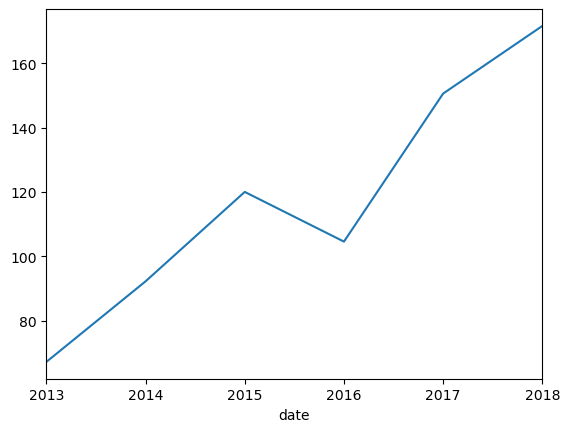

In [71]:
apple_df['close'].resample('Y').mean().plot()

<Axes: xlabel='date'>

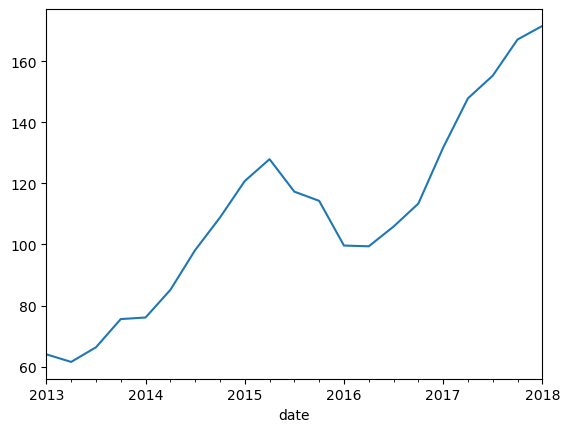

In [72]:
apple_df['close'].resample('Q').mean().plot()

In [73]:
#checking closing prices of amazon,google,microsoft,apple are correlated or not

In [74]:
company_list

['C:\\\\Users\\\\nidhi\\\\stocks_data\\\\AAPL_data.csv',
 'C:\\\\Users\\\\nidhi\\\\stocks_data\\\\AMZN_data.csv',
 'C:\\\\Users\\\\nidhi\\\\stocks_data\\\\GOOGL_data.csv',
 'C:\\\\Users\\\\nidhi\\\\stocks_data\\\\MSFT_data.csv']

In [75]:
apple=pd.read_csv(company_list[0])
amzn=pd.read_csv(company_list[1])
google=pd.read_csv(company_list[2])
msft=pd.read_csv(company_list[3])

In [76]:
closing_data=pd.DataFrame()

In [77]:
closing_data['Apple_close']=apple['close']
closing_data['Amazon_close']=amzn['close']
closing_data['Google_close']=google['close']
closing_data['MSFT_close']=msft['close']


In [78]:
closing_data

Apple_close  Amazon_close  Google_close  MSFT_close
0         67.8542        261.95      393.0777       27.55
1         68.5614        257.21      391.6012       27.86
2         66.8428        258.70      390.7403       27.88
3         66.7156        269.47      391.8214       28.03
4         66.6556        269.24      394.3039       28.04
...           ...           ...           ...         ...
1254     167.7800       1390.00     1181.5900       94.26
1255     160.5000       1429.95     1119.2000       91.78
1256     156.4900       1390.00     1062.3900       88.00
1257     163.0300       1442.84     1084.4300       91.33
1258     159.5400       1416.78     1055.4100       89.61

[1259 rows x 4 columns]

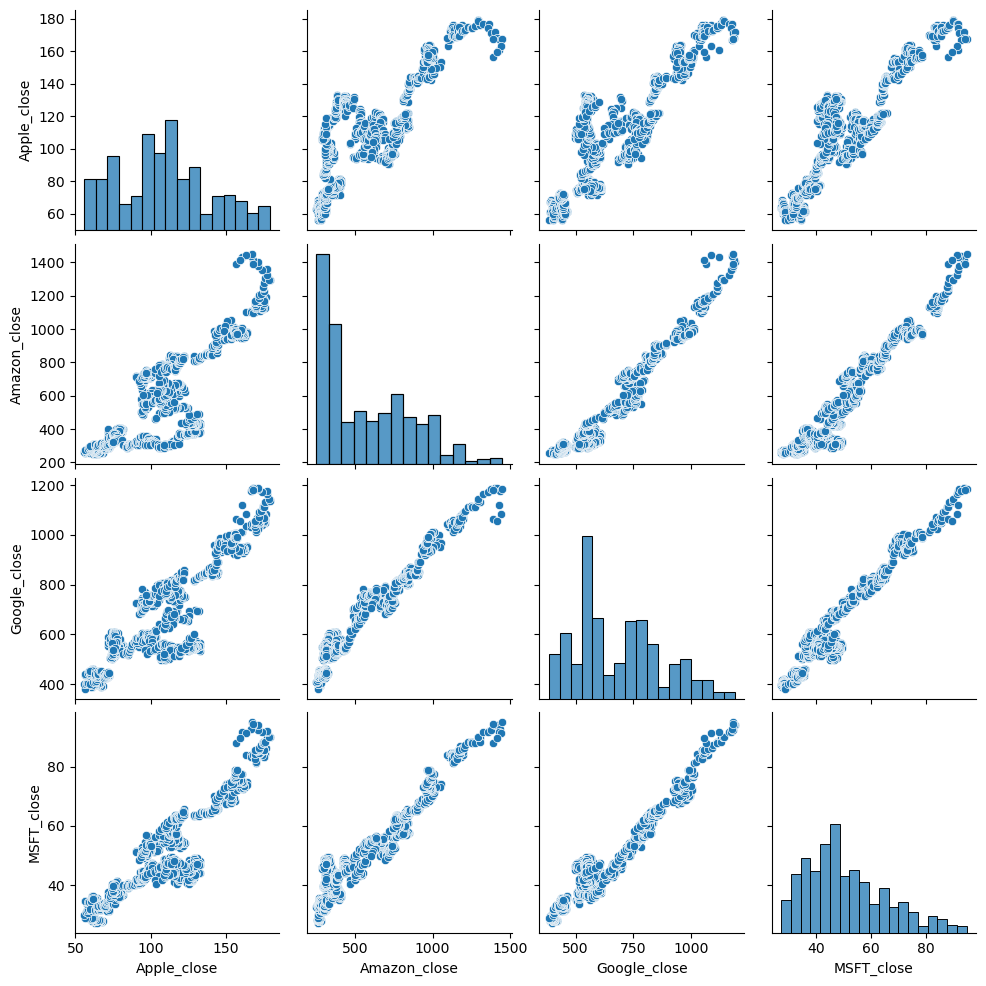

In [79]:
sns.pairplot(closing_data)

In [80]:
closing_data.corr()

Apple_close  Amazon_close  Google_close  MSFT_close
Apple_close      1.000000      0.819078      0.843736    0.899689
Amazon_close     0.819078      1.000000      0.973988    0.955977
Google_close     0.843736      0.973988      1.000000    0.970779
MSFT_close       0.899689      0.955977      0.970779    1.000000

<Axes: >

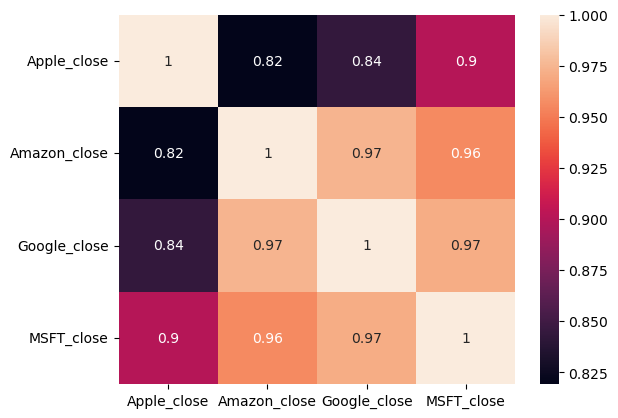

In [81]:
sns.heatmap(closing_data.corr(),annot=True)

In [82]:
# checking correlation between daily stock price of all these and daily return 

In [85]:
closing_data['Apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: Apple_close, Length: 1259, dtype: float64

In [86]:
closing_data['Apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: Apple_close, Length: 1259, dtype: float64

In [87]:
closing_return=pd.DataFrame()

In [91]:
((closing_data['Apple_close']- closing_data['Apple_close'].shift(1))/(closing_data['Apple_close'].shift(1)))*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: Apple_close, Length: 1259, dtype: float64

In [93]:
closing_data.columns

Index(['Apple_close', 'Amazon_close', 'Google_close', 'MSFT_close'], dtype='object')

In [94]:
for col in closing_data.columns:
    closing_data[col+'_pct_change']= ((closing_data[col]- closing_data[col].shift(1))/(closing_data[col].shift(1)))*100

In [95]:
closing_data

Apple_close  Amazon_close  Google_close  MSFT_close  \
0         67.8542        261.95      393.0777       27.55   
1         68.5614        257.21      391.6012       27.86   
2         66.8428        258.70      390.7403       27.88   
3         66.7156        269.47      391.8214       28.03   
4         66.6556        269.24      394.3039       28.04   
...           ...           ...           ...         ...   
1254     167.7800       1390.00     1181.5900       94.26   
1255     160.5000       1429.95     1119.2000       91.78   
1256     156.4900       1390.00     1062.3900       88.00   
1257     163.0300       1442.84     1084.4300       91.33   
1258     159.5400       1416.78     1055.4100       89.61   

      Apple_close_pct_change  Amazon_close_pct_change  \
0                        NaN                      NaN   
1                   1.042235                -1.809506   
2                  -2.506658                 0.579293   
3                  -0.190297                 4.163123   
4                  -0.089934                -0.085353   
...                      ...                      ...   
1254                0.209043                -4.196734   
1255               -4.339015                 2.874101   
1256               -2.498442                -2.793804   
1257                4.179181                 3.801439   
1258               -2.140710                -1.806160   

      Google_close_pct_change  MSFT_close_pct_change  
0                         NaN                    NaN  
1                   -0.375625               1.125227  
2                   -0.219841               0.071788  
3                    0.276680               0.538020  
4                    0.633579               0.035676  
...                       ...                    ...  
1254                -0.053290              -0.789391  
1255                -5.280173              -2.631021  
1256                -5.075947              -4.118544  
1257                 2.074568               3.784091  
1258                -2.676060              -1.883280  

[1259 rows x 8 columns]

In [96]:
closing_data.columns

Index(['Apple_close', 'Amazon_close', 'Google_close', 'MSFT_close',
       'Apple_close_pct_change', 'Amazon_close_pct_change',
       'Google_close_pct_change', 'MSFT_close_pct_change'],
      dtype='object')

In [98]:
closing_p=closing_data[['Apple_close_pct_change', 'Amazon_close_pct_change','Google_close_pct_change', 'MSFT_close_pct_change']]

In [99]:
closing_p

Apple_close_pct_change  Amazon_close_pct_change  \
0                        NaN                      NaN   
1                   1.042235                -1.809506   
2                  -2.506658                 0.579293   
3                  -0.190297                 4.163123   
4                  -0.089934                -0.085353   
...                      ...                      ...   
1254                0.209043                -4.196734   
1255               -4.339015                 2.874101   
1256               -2.498442                -2.793804   
1257                4.179181                 3.801439   
1258               -2.140710                -1.806160   

      Google_close_pct_change  MSFT_close_pct_change  
0                         NaN                    NaN  
1                   -0.375625               1.125227  
2                   -0.219841               0.071788  
3                    0.276680               0.538020  
4                    0.633579               0.035676  
...                       ...                    ...  
1254                -0.053290              -0.789391  
1255                -5.280173              -2.631021  
1256                -5.075947              -4.118544  
1257                 2.074568               3.784091  
1258                -2.676060              -1.883280  

[1259 rows x 4 columns]

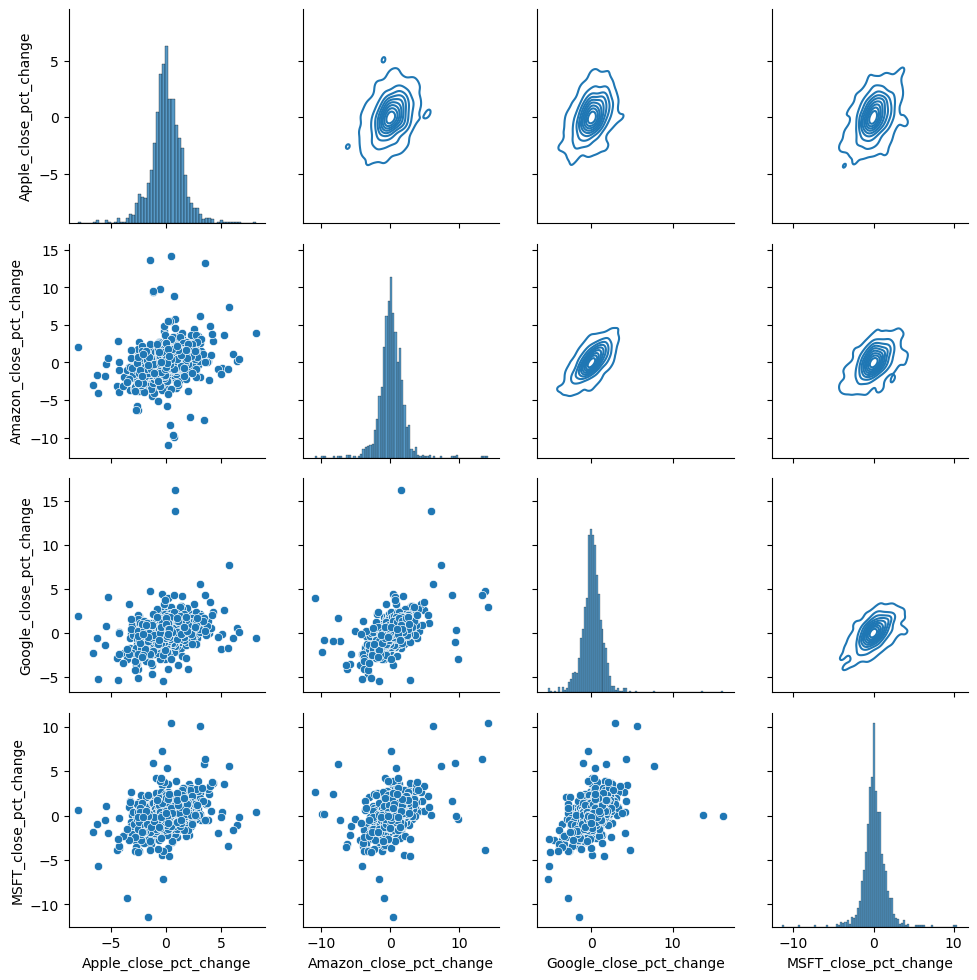

In [102]:
g=sns.PairGrid(closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [103]:
closing_p.corr()

Apple_close_pct_change  Amazon_close_pct_change  \
Apple_close_pct_change                 1.000000                 0.287659   
Amazon_close_pct_change                0.287659                 1.000000   
Google_close_pct_change                0.348858                 0.548423   
MSFT_close_pct_change                  0.366598                 0.402678   

                         Google_close_pct_change  MSFT_close_pct_change  
Apple_close_pct_change                  0.348858               0.366598  
Amazon_close_pct_change                 0.548423               0.402678  
Google_close_pct_change                 1.000000               0.488373  
MSFT_close_pct_change                   0.488373               1.000000